In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats.stats import pearsonr
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [2]:
# dados originais
insurances = pd.read_csv('insurance_migue2.csv')
insurances

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520
5,31,0,25.740,0,0,1,3756.62160
6,46,0,33.440,1,0,1,8240.58960
7,37,0,27.740,3,0,2,7281.50560
8,37,1,29.830,2,0,3,6406.41070
9,60,0,25.840,0,0,2,28923.13692


In [3]:
print('Correlação Idade: %0.5f' % pearsonr(insurances['age'], insurances['charges'])[0])
print('Correlação Sexo: %0.5f' % pearsonr(insurances['sex'], insurances['charges'])[0])
print('Correlação IMC: %0.5f' % pearsonr(insurances['bmi'], insurances['charges'])[0])
print('Correlação Filhos: %0.5f' % pearsonr(insurances['children'], insurances['charges'])[0])
print('Correlação Fumante: %0.5f' % pearsonr(insurances['smoker'], insurances['charges'])[0])
print('Correlação Região: %0.5f' % pearsonr(insurances['region'], insurances['charges'])[0])

Correlação Idade: 0.29901
Correlação Sexo: 0.05729
Correlação IMC: 0.19834
Correlação Filhos: 0.06800
Correlação Fumante: 0.78725
Correlação Região: 0.00621


In [4]:
x_range = [insurances['smoker'].min(),insurances['smoker'].max()]
y_range = [insurances['charges'].min(),insurances['charges'].max()]

print(x_range)
print(y_range)

[0, 1]
[1121.8739, 63770.42801]


In [5]:
model = linear_model.LinearRegression(normalize=False, fit_intercept=True)

num_observ = len(insurances)
x = insurances['smoker'].values.reshape((num_observ, 1))
y = insurances['charges'].values

model.fit(x, y)
predicts = model.predict(x)
print('Score do modelo: ', model.score(x, y))

Score do modelo:  0.6197648148218988


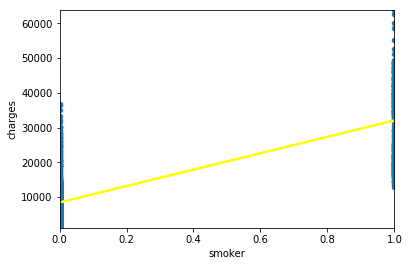

In [6]:
scatter_plot = insurances.plot(kind='scatter', x='smoker', y='charges', xlim=x_range, ylim=y_range)
regression_line = scatter_plot.plot(insurances['smoker'], predicts, '-', color='yellow', linewidth=2)

In [7]:
print(model.coef_)
print(model.intercept_)

[23615.96353368]
8434.2682978562


In [8]:
sum_squared_regression = pd.Series(predicts - insurances['charges'].mean())**2
SSR = np.sum(sum_squared_regression)
print('Soma dos quadrados da regressão (SSR): ', SSR)

Soma dos quadrados da regressão (SSR):  121519903621.66714


In [9]:
sum_squared_errors = pd.Series(predicts - insurances['charges'])**2
SSE = np.sum(sum_squared_errors)
print('Soma dos quadrados da regressão (SSE): ', SSE)

Soma dos quadrados da regressão (SSE):  74554317946.7001


In [10]:
SST = (SSE + SSR)
print('SSE + SSR = SST: ', SST)

SSE + SSR = SST:  196074221568.36725


In [11]:
R2 = 1 - SSE / SST
print('R² = 1 - SSE / SST: ', R2)

R² = 1 - SSE / SST:  0.619764814821899


In [12]:
print('Valores esperados: \n', insurances['charges'].values[0:10])
print('Valores previstos: \n', predicts[:10])

Valores esperados: 
 [16884.924    1725.5523   4449.462   21984.47061  3866.8552   3756.6216
  8240.5896   7281.5056   6406.4107  28923.13692]
Valores previstos: 
 [32050.23183153  8434.26829786  8434.26829786  8434.26829786
  8434.26829786  8434.26829786  8434.26829786  8434.26829786
  8434.26829786  8434.26829786]
